In [6]:
from krylov import Krylov
from laf import LinearAssignmentFlow

import numpy as np
from skimage import img_as_float
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

### Setup

In [7]:
img = img_as_float(imread("../images/Scales1.png"))

# ground truth labels
labels = np.asarray(
    [[0.203, 0.656, 0.324],  # darkgreen
    [0.891, 0.043, 0.0],  # red
    [0.258, 0.188, 0.953],  # dark blue
    [0.98, 0.848, 0.02],  # yellow
    [0.082, 0.973, 0.375],  # lightgreen
    [0.258, 0.52, 0.953],  # light blue
    [0.902, 0.227, 0.867],  # violet
    [0.914, 0.484, 0.141]]  # brown
)

### Parameters

In [8]:
m_dims = [2, 4, 8, 16, 32]
img_sizes = [50, 100, 200, 400]


### Experiment

In [9]:
times = []
for size in img_sizes:
    img_ = resize(img, (size, size))
    laf = LinearAssignmentFlow(img_, labels)
    A, b = laf()

    krylov = Krylov(A, b, img_.shape)
    for m in m_dims:
        results = krylov(m, [1], labels)
    times.append([call['times'][0] for call in krylov.calls])

100%|██████████| 31/31 [00:02<00:00, 11.33it/s]


### Visualization

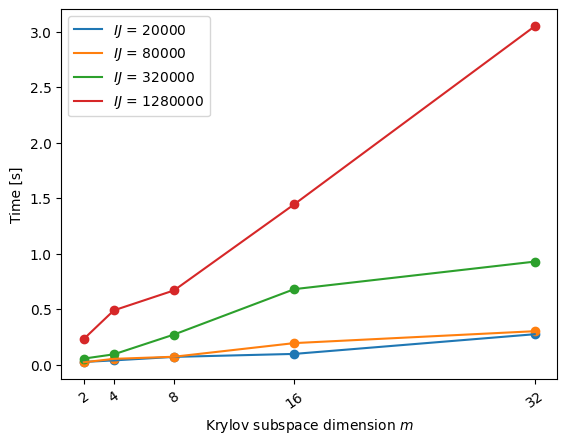

In [10]:
for i in range(len(img_sizes)):
    plt.plot(m_dims, times[i], label=fr"$IJ$ = {img_sizes[i] * img_sizes[i] * len(labels)}")
    plt.scatter(m_dims, times[i])
plt.xticks(m_dims, rotation=35)
plt.xlabel(r"Krylov subspace dimension $m$")
plt.ylabel("Time [s]")
plt.legend()
plt.show()